In [1]:
from math import sin, cos, log, ceil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [45]:
# problem parameters
ms = 50         # mass of the rocket shell [kg]
g = 9.81         # acceleration due to gravity [m/s^2]
rho = 1.091      # average air density [kg/m^3], assumed constant
A = np.pi*0.5**2 # max cross sectional area of rocket [m]
v_e = 325        # exhaust speed [m/s]
C_D = 0.15       # drag coefficient

# initial conditions
mp0 = 100        # initial mass of rocket propellant [kg] (at t = 0)
mp_dot = 20      # fuel burn rate [kg/s]
A = np.pi*0.5**2 # max cross sectional area of rocket [m]
v_e = 325        # exhaust speed [m/s]

dt = 0.1         # time increment [s]
fuel_time = 10   # information we know about fuel burning
N_fuel = int(fuel_time/dt)+1

T = 100          # first guess at total time [s]
N = int(T/dt)+1
t = np.linspace(0,T,N) # time discretization

In [63]:
def euler_step(u, f, dt):
    return u + dt*f(u)

def f(u):
    h = u[0]
    v = u[1]
    mp = u[2]
    return np.array([v,
                    -g + (20*v_e - 0.5*rho*v*np.abs(v)*A*C_D)/(ms + mp),
                    -mp_dot if mp > 0 else 0])

In [99]:
T = 1000          # first guess at total time [s]
N = int(T/dt)+1
t = np.linspace(0,T,N) # time discretization

# initiallize things
u = np.empty((N,3))
u[0] = np.array([0, 0, mp0])
u[50:,2] = 0

#time loop
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [100]:
# how much fuel is there?
t_fuel = 3.2 # what time do you want the remaining amound of fuel?
print('At time t = 3.2 seconds, there is %0.2f [kg] of rocket propellent remaining in the rocket' % mp[int(t_fuel/dt)])

At time t = 3.2 seconds, there is 36.00 [kg] of rocket propellent remaining in the rocket


In [101]:
# maximum velocity and altitude of rocket?
v_max = np.amax(u[:,1])
v_max_ind = np.where(u[:,1] == v_max)
h_max = np.amax(u[:,0])
print('The maximum velocity the rocket reaches is: %0.3f [m/s]\n\
Which happens at time = %0.3f [sec]\n\
Where the rocket has reached a height of %0.3f [m]' % (v_max, t[v_max_ind[0][0]], h_max))

The maximum velocity the rocket reaches is: 305.796 [m/s]
Which happens at time = 45.300 [sec]
Where the rocket has reached a height of 304689.998 [m]


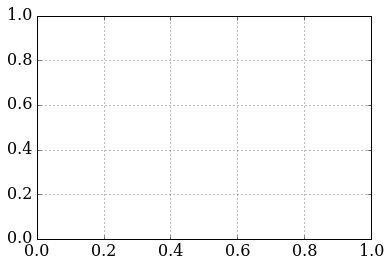

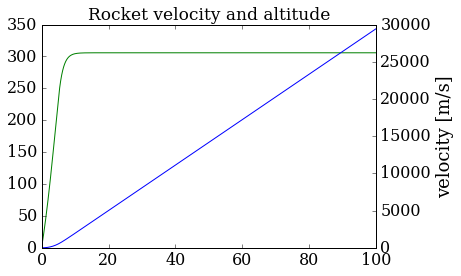

In [81]:
# plot rocket velocity and height
#plt.figure(figsize=(10,8))
plt.grid(True)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t, u[:,1], 'g-')
ax2.plot(t, u[:,0], 'b-')
plt.xlabel(r'time [s]', fontsize=18)
plt.ylabel(r'velocity [m/s]', fontsize=18)
plt.title('Rocket velocity and altitude', fontsize=17)

In [84]:
t

array([   0. ,    0.1,    0.2, ...,   99.8,   99.9,  100. ])